#**Logistic Regression**#
To help you better understand the pros and cons of first- and second-order methods,
we will look at Logistic Regression as an example. \\


**Step 1**: You already have the gradient descent algorithm (use the line search version from PA1). Now,
code up the Newton’s method algorithm as well. Write a function using the format below:

In [0]:
import timeit
import time
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
import math

def gd_ls(f,fp,y,A,xinit,ss_init,maxit,tol):
  """
  Note that ss changes to ss_init
  ss_init is the starting stepsize for backtracking
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  stop = False
  a = 1
  b = .5
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    t = ss_init
    while f(y, A, np.subtract(xList[count], (t*gradient))) > value - a/2*t*math.pow(np.linalg.norm(gradient, 2),2):
      t = b*t
    update = np.subtract(xList[count], (t*gradient))
    xList.append(update)
    count+=1
    #print(xList[count])
    #print(value)
    #print(f(y, A, xList[count]))
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return xList[count], count

def gd_ls_graph(f,fp,y,A,xinit,ss_init,maxit,tol):
  """
  Note that ss changes to ss_init
  ss_init is the starting stepsize for backtracking
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  coef = []
  stop = False
  a = 1
  b = .5
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    t = ss_init
    while f(y, A, np.subtract(xList[count], (t*gradient))) > value - a/2*t*math.pow(np.linalg.norm(gradient, 2),2):
      t = b*t
    update = np.subtract(xList[count], (t*gradient))
    xList.append(update)
    coef.append(update[0])
    count+=1
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return xList[count], xList, coef, count,

def gd_const_graph(f,fp,y,A,xinit,ss,maxit,tol):
  """
  f is the handle for the minimization objective
  fp is the handle for the gradient
  y is the input observation vector
  A is the input matrix of covariates
  x_init is the initalized value of the regression coefficient
  ss is the constant step size
  maxit and tol help you terminate the iterations
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  objList = []
  coef = []
  stop = False
  while not stop:
    value = f(y, A, xList[count])
    print(value)
    gradient = fp(y, A, xList[count])
    objList.append(value)
    update = np.subtract(xList[count], (ss*gradient))
    xList.append(update)
    coef.append(update[0])
    count+=1
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return coef, objList, count

def nt(f,fp,fpp,y,A,xinit,maxit,tol):
  """
  f is the handle for the minimization objective
  fp is the handle for the gradient
  y is the input observation vector
  A is the input matrix of covariates
  x_init is the initalized value of the regression coefficient
  ss is the constant step size
  maxit and tol help you terminate the iterations
  """
  # Add your code here
  count = 0
  xList = []
  xList.append(xinit)
  objList = []
  stop = False
  while not stop:
    value = f(y, A, xList[count])
    gradient = fp(y, A, xList[count])
    objList.append(value)
    update = np.subtract(xList[count], np.matmul(np.linalg.inv(fpp(y, A, xList[count])),gradient))
    xList.append(update)
    count+=1
    if count >= maxit:
      print("maxit")
      break
    elif abs((f(y, A, xList[count])-value)/value) < tol:
      print("convergence")
      break
  return xList[count], xList, objList, count


**Note**: we will implement the basic version of Newton’s method (not BFGS or L-BFGS). We will also
use the basic method to implement the Newton step by inverting the Hessian using np.linalg.inv.
There are more efficient ways to do this inversion, but for the purpose of this assignment, do **NOT** use
other ways even if you know them. The convergence criterion is the same as that in PA1.

*Answer the questions and discuss your findings here*


**Step 2**: Code the objective function, the gradient, and the **Hessian** (you can use the Python lambda
tool just like in PA1, or the regular function environment if you don’t like that). As a reminder, logistic
regression has the following model
$$y_i \in \{0,1\}, \quad p(y_i = 1) = \text{sigmoid}(\mathbf{a}_i^T \mathbf{x}) =  \frac{1}{1+e^{-\mathbf{a}_i^T \mathbf{x}}}, \quad p(y_i=0) = 1 - p(y_i = 1).$$
The likelihood can be written as 
$$p(y_i \,|\, \mathbf{a}_i^T \mathbf{x}) = p(y_i = 1 \, | \, \mathbf{a}_i^T \mathbf{x})^y_i \cdot p(y_i = 0 \, | \, \mathbf{a}_i^T \mathbf{x})^{1-y_i} $$
So we are solving the following optimization problem that minimizes the total negative log-likelihood
minimize \\
$$\underset{\mathbf{x}}{\text{minimize}} \quad \quad  - \sum_{i=1}^M (y_i \log \frac{1}{1+e^{-\mathbf{a}_i^T \mathbf{x}}} + (1-y_i) \log \frac{1}{1+e^{\mathbf{a}_i^T \mathbf{x}}}),$$
or equivalently 
$$minimize_{\mathbf{x}} \sum_{i=1}^{M}\log({1+e^{-(2y_i-1)a_i^T \mathbf{x}}})$$
where $y_i$ is the $i^{th}$ entry of the observation vector $\mathbf{y}$ and $\mathbf{a}_i$ is a column vector corresponding to the $i^{th}$ row of the matrix of covariates **A**.


In [0]:
def objective(y, A, x):
  return np.sum(np.log(1+np.exp(-1*(2*y-1)*np.dot(A,x))))

def sigmoid(A, x):
  s1 = 1+ np.exp(np.dot(-1*A,x))
  s2 = 1/s1
  return s2

def gradient(y, A, x):
  return np.sum((1/(1+np.exp(-((2*y)-1)*np.dot(A,x)))*(np.negative((2*y-1)*A))*np.exp(-((2*y)-1)*np.dot(A,x))), 0)[:, np.newaxis]
                                                                                          
def hessian(y, A, x):
  print("hi")
  count = 0
  hesh = 0
  while count < len(A):
    yi = y[count]
    ai = A[count, :]
    xi = np.matmul(np.transpose(ai), x)
    term = (math.pow((2*yi-1),2)*np.exp((2*yi-1)*xi))
    term2 = (1/(np.exp((2*yi-1)*xi)+1))
    term = (term*term2)*(term2)*np.dot(ai[:,np.newaxis], np.transpose(ai[:,np.newaxis]))
    count+=1
    hesh = hesh + term
  return hesh

I struggled while trying to write the hessian without a loop. Is it possible? I decided to use a loop inorder to continue the project however I would like to see if there is a more optimal solution.

**Step 3**: Generate data. Set numpy’s random seed to 0. Then, generate the matrix of covariates
**A** $\in \mathbb{R}^{M \times N}$, which has i.i.d. entries distributed as N (0, 1). Use the same method, generate the
regression coefficient vector $\mathbf{x}$ $\in$ $\mathbb{R}^N$ as well. Then, generate the observation vector $\mathbf{y} \in \{0, 1\}^M$ using
np.random.binomial().

In [0]:
np.random.seed(0)
M= 100
N= 20

A = np.random.normal(0, 1, (M,N))
x = np.random.normal(0, 1, (N,1))
y = np.random.binomial(1, sigmoid(A,x), (M,1))

z = hessian(y, A, x)

#print(sigmoid(A,x))

#print(A)
#print('---')
#print(x)
#print('---')
#print(y)
#print('---')

#plt.hist(A)
#plt.show()
maxit = 10000
tol = 1e-15

[[ 7.77459786e+00 -9.73289389e-01 -7.94142099e-01  3.96772430e-01
  -1.44709493e+00  1.69919277e-01  5.00814685e-01  7.79331909e-01
   2.25007891e+00  1.10504627e+00  1.39336278e+00 -4.31714911e-01
  -1.05636223e-01  1.87208703e+00  1.06769270e+00  2.28213632e-01
  -3.76466192e-01  1.19234627e-01 -1.21223443e+00  1.26521009e+00]
 [-9.73289389e-01  7.45585113e+00  1.36552730e+00  5.92187938e-01
   8.58856640e-01 -5.29625989e-01 -1.27099643e-01 -1.05891652e+00
   1.33261448e+00  5.35958868e-01  1.63371612e+00  2.54528178e-01
   1.37853383e+00  3.79210283e-01 -3.29561680e-02 -5.49098865e-01
  -7.98495753e-01  1.00672933e+00 -1.96919846e+00 -9.05234311e-01]
 [-7.94142099e-01  1.36552730e+00  5.90011880e+00 -1.36723467e+00
   5.61600477e-01  8.92514812e-01  1.83431470e-01 -8.37975738e-01
  -3.75074980e-01  4.07994807e-01  1.95444046e+00 -4.76976369e-01
  -1.39355169e-01 -2.99777470e-01  6.03552326e-01 -1.69832145e-01
   1.16713499e-01 -5.38506484e-01  2.18991356e-01  2.42508678e-01]
 [ 3.96

*Answer the questions and discuss your findings here*


**Step 4**: Run your code. Apply both algorithms to the logistic regression objective. The algorithm
parameters (maxit and tol) should be the same as that in PA1. Note that for logistic regression,
it could be difficult to choose the ss_init parameter. For this assignment, we will set it to be 400
divided by the square of the maximum singular value of the matrix **A**.

convergence
[[-2.60306755]
 [-1.88156986]
 [ 0.75199864]
 [-1.97358813]
 [-1.12304669]
 [-0.37503633]
 [-1.84714497]
 [-1.04104492]
 [ 1.20379471]
 [ 0.51733944]
 [-0.64446334]
 [-0.87598462]
 [ 1.74315912]
 [ 1.61690774]
 [ 0.7198775 ]
 [-2.4220529 ]
 [ 1.44830567]
 [ 1.09812547]
 [-4.08131491]
 [ 0.65243035]]


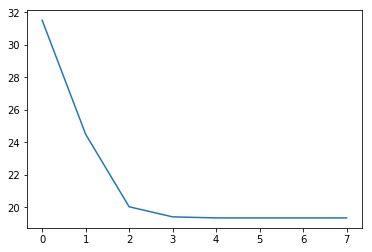

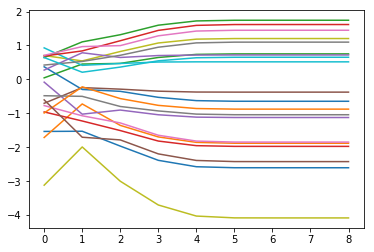

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


convergence
[[-2.60306696]
 [-1.88156933]
 [ 0.75199838]
 [-1.97358773]
 [-1.12304647]
 [-0.37503629]
 [-1.84714437]
 [-1.04104453]
 [ 1.20379436]
 [ 0.51733946]
 [-0.64446299]
 [-0.87598433]
 [ 1.74315871]
 [ 1.61690719]
 [ 0.71987737]
 [-2.42205221]
 [ 1.4483052 ]
 [ 1.09812503]
 [-4.08131381]
 [ 0.65243004]]


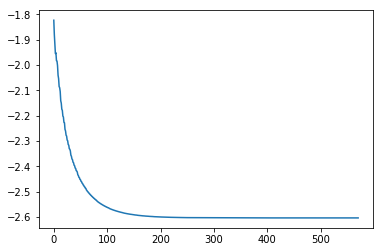

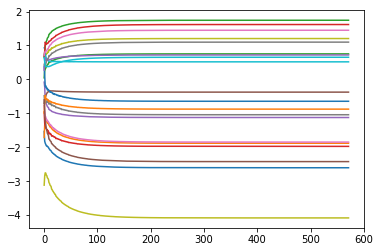

In [0]:
xIn = x
ss_init = 400/math.pow((np.amax(A)), 2)
xFin, xList, values, count= nt(objective,gradient, hessian,y,A,xIn,maxit,tol)
print(xFin)
plt.plot(range(0,count), values)


plt.show()

plt.plot(range(0,count+1), np.squeeze(xList))

plt.show()

xFin, xList, values, count= gd_ls_graph(objective,gradient,y,A,xIn, ss_init, maxit,tol)
print(xFin)
plt.plot(range(0,count), values)


plt.show()

plt.plot(range(0,count+1), np.squeeze(xList))

plt.show()

*Answer the questions and discuss your findings here*


**1**) First, set M = 100 and N = 20. At convergence, print out the final cost, time taken, and number of
iterations used by both algorithms. You should see that the final costs are more or less the same. Which
algorithm is faster overall? Which algorithm converges in fewer iterations? Which algorithm has a longer
per-iteration run time? Why?


In [0]:
start = time.time()
xFin, xList, values, count= nt(objective,gradient, hessian,y,A,xIn,maxit,tol)
end = time.time()

print("Newton's Method:")
print("Final Cost: ", end='')
print(objective(y, A, xFin))
print("Time taken: ", end='')
print(end - start)
print("Iterations: ", end='')
print(count)
print("Time Per Iteration: ", end='')
print((end - start)/float(count))

start = time.time()
xFin, xList, values, count= gd_ls_graph(objective,gradient,y,A,xIn, ss_init, maxit,tol)
end = time.time()

print("Backtracking Line Search:")
print("Final Cost: ", end='')
print(objective(y, A, xFin))
print("Time taken: ", end='')
print(end - start)
print("Iterations: ", end='')
print(count)
print("Time Per Iteration: ", end='')
print((end - start)/float(count))

convergence
Newton's Method:
Final Cost: 19.339725741187596
Time taken: 0.038234710693359375
Iterations: 8
Time Per Iteration: 0.004779338836669922


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


convergence
Backtracking Line Search:
Final Cost: 19.33972574118803
Time taken: 0.5746080875396729
Iterations: 571
Time Per Iteration: 0.0010063188923637003


Newton's method is much faster and converges in fewer iterations. This is because it's much more accurate in chosing an x by esimating like a polynomial instead of backtracking line search which estimates linearly with a constant step size. However, line search is much faster per iteration because calculating and then inverting a hessian is a costly procsess.

**2**) Change the problem dimension to M = 10000 and N = 20. What happens now? How about in the
case of N = 100? Which algorithm is faster overall? Why?


In [0]:
np.random.seed(0)
M= 10000
N= 20

A = np.random.normal(0, 1, (M,N))
x = np.random.normal(0, 1, (N,1))
y = np.random.binomial(1, sigmoid(A,x), (M,1))
ss_init = 400/math.pow((np.amax(A)), 2)

start = time.time()
xFin, xList, values, count= nt(objective,gradient, hessian,y,A,x,maxit,tol)
end = time.time()

print(str(M) + "x" + str(N))
print()
print("Newton's Method:")
print("Final Cost: ", end='')
print(objective(y, A, xFin))
print("Time taken: ", end='')
print(end - start)
print("Iterations: ", end='')
print(count)
print("Time Per Iteration: ", end='')
print((end - start)/float(count))

start = time.time()
xFin, xList, values, count= gd_ls_graph(objective,gradient,y,A,x, ss_init, maxit,tol)
end = time.time()

print("Backtracking Line Search:")
print("Final Cost: ", end='')
print(objective(y, A, xFin))
print("Time taken: ", end='')
print(end - start)
print("Iterations: ", end='')
print(count)
print("Time Per Iteration: ", end='')
print((end - start)/float(count))

M= 10000
N= 100

A = np.random.normal(0, 1, (M,N))
x = np.random.normal(0, 1, (N,1))
y = np.random.binomial(1, sigmoid(A,x), (M,1))
ss_init = 400/math.pow((np.amax(A)), 2)

start = time.time()
xFin, xList, values, count= nt(objective,gradient, hessian,y,A,x,maxit,tol)
end = time.time()

print(str(M) + "x" + str(N))
print()
print("Newton's Method:")
print("Final Cost: ", end='')
print(objective(y, A, xFin))
print("Time taken: ", end='')
print(end - start)
print("Iterations: ", end='')
print(count)
print("Time Per Iteration: ", end='')
print((end - start)/float(count))

start = time.time()
xFin, xList, values, count= gd_ls_graph(objective,gradient,y,A,x, ss_init, maxit,tol)
end = time.time()

print("Backtracking Line Search:")
print("Final Cost: ", end='')
print(objective(y, A, xFin))
print("Time taken: ", end='')
print(end - start)
print("Iterations: ", end='')
print(count)
print("Time Per Iteration: ", end='')
print((end - start)/float(count))

convergence
10000x20

Newton's Method:
Final Cost: 2658.3924267430752
Time taken: 1.1309328079223633
Iterations: 4
Time Per Iteration: 0.2827332019805908


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


convergence
Backtracking Line Search:
Final Cost: 2658.3924267430766
Time taken: 0.8339920043945312
Iterations: 40
Time Per Iteration: 0.02084980010986328
convergence
10000x100

Newton's Method:
Final Cost: 1305.0528771315132
Time taken: 2.9312386512756348
Iterations: 5
Time Per Iteration: 0.586247730255127
convergence
Backtracking Line Search:
Final Cost: 1305.052877131527
Time taken: 5.505640506744385
Iterations: 196
Time Per Iteration: 0.028090002585430533


When N = 20 backtracking line search was infact faster because it found a minima quickly using more iterations that took only .02 seconds each. Since there were only 20 values in the coeeficent matrix that needed to be optimized this linear estimation worked well.

However, when N = 200 line search took almost twice as long because estimating linearly was certainly not an optimal way to estimate over so many coeeficients. Newton's Method converged in only 5 costly iterations. The time per iteration of line search does not vary much as N is changed however the number of iterations increases by 5 times which is proportional to the increase in n values from 20 to 100.

**3**) Load the given data file noisy1.npz. Select one algorithm to recover $\mathbf{x}$ using the same approach as that in PA1. Which algorithm are you going to select? Why? Reshape it to a $40 \times 40$ matrix. Visualize it as an image in grayscale using matplotlib. What do you think is the original image? 

In [0]:
from google.colab import drive 
drive.mount('drive')

Mounted at drive


(5000, 1600)
(5000, 1)
(1600, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


maxit


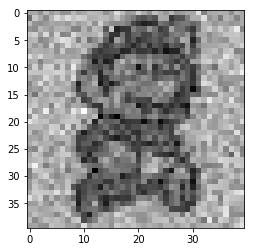

In [0]:
with np.load('drive/My Drive/noisy1.npz') as data:
    A = data['A']
    y = data['y']
    
print(A.shape)
y = y[:, np.newaxis]
print(y.shape)
xinit = np.ones(1600)[:, np.newaxis]
print(xinit.shape)
ss_init = 400/math.pow((np.amax(A)), 2)

xFin, xList, values, count= gd_ls_graph(objective,gradient,y,A,xinit, ss_init, maxit,tol)

img = xFin.reshape((40,40))

import matplotlib.image as mpimg
plt.gray()
imgplot = plt.imshow(img)

Whenever I ran this using Newton's Method I encountered a math error in my hessian function. However, ideally I would have used newton's method for this problem because it is quite faster when optimizing over more coefficients.

It's definetly looks like mario jumping

In [0]:
print(xFin)

[[0.99131599]
 [1.01882432]
 [0.65275198]
 ...
 [1.00250813]
 [1.587892  ]
 [1.91163388]]


In [0]:
with np.load('drive/My Drive/noisy1.npz') as data:
    A = data['A']
    y = data['y']
    
print(A.shape)
y = y[:, np.newaxis]
print(y.shape)
xinit = np.random.normal(0, 1, (1600,1))
xFin2, xList, values, count= nt(objective,gradient, hessian,y,A,xinit,5,tol)

(5000, 1600)
(5000, 1)
hi


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


hi
hi
hi
hi
maxit


[[0.99131599 1.01882432 0.65275198 ... 0.58297399 1.17578139 0.9784551 ]
 [0.11988669 1.50003963 1.05399734 ... 1.04063565 0.44109568 1.03428705]
 [1.32113868 0.68841652 0.60173293 ... 0.68666674 0.83430343 1.03077881]
 ...
 [0.93577977 1.37189658 1.14567659 ... 0.62803547 0.58229124 0.5623676 ]
 [1.31493621 0.52159876 0.98574217 ... 0.85781399 1.13874355 1.69154473]
 [0.884514   0.96719049 0.67674959 ... 1.00250813 1.587892   1.91163388]]


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


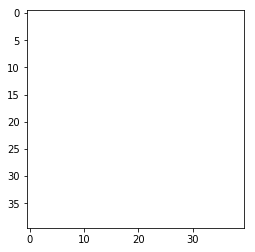

In [0]:
print(xFin.reshape((40,40)))
img2 = xFin2.reshape((40,40))

plt.gray()
imgplot = plt.imshow(img2)

#Add Colab link here: # https://colab.research.google.com/drive/1Bh9buvJ8V3JqhrGNmc3_nHCj3MRDJjB4